In [14]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import torch
from torch.functional import F

In [15]:
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

In [28]:
tokenizer.encode("Hello, my dog is cute", return_tensors="pt")

tensor([[15496,    11,   616,  3290,   318, 13779]])

In [25]:
tokenizer.decode(tokenizer.encode("Hello, my dog is cute", return_tensors="pt")[0], skip_special_tokens=False)

'Hello, my dog is cute'

In [32]:
2**10

1024

In [90]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [12]:
positional_encodings = model.state_dict()['transformer.wpe.weight']

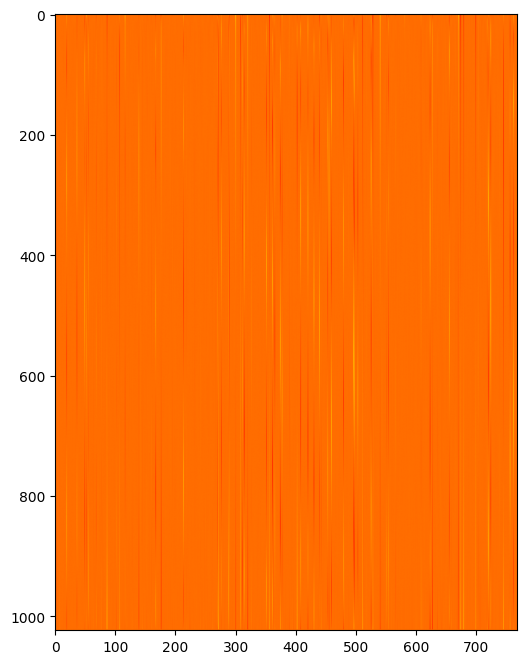

In [36]:
plt.figure(figsize=(10,8));
plt.imshow(positional_encodings.detach(), cmap="hot");

## Inference Test

In [76]:
text_input = "Hello i am Vasilis an Electrical and Computer Engineer,"
encoded_input = tokenizer.encode(text_input, return_tensors="pt")
print(f"'{text_input}'\ntransformed to the following tokens:\n{encoded_input}")

'Hello i am Vasilis an Electrical and Computer Engineer,'
transformed to the following tokens:
tensor([[15496,  1312,   716, 23663,   346,   271,   281, 40224,   290, 13851,
         23164,    11]])


In [86]:
model_output_encoded = model.generate(
    encoded_input,
     max_new_tokens=20, do_sample=True, top_k=50, top_p=0.30, temperature = 1.1
)[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [87]:
input_length = len(text_input)
output_text = tokenizer.decode(model_output_encoded)
print(f"And the model answered\n'{output_text[input_length:].strip()}'")

And the model answered
'I am a member of the International Computer Science Association (ICSA) and I am the Director of'
